# Go/NoGo modeling results

### Sepehr Feb 2022

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import numpy as np
# import json
# from tqdm import tqdm_notebook 
import statsmodels.formula.api as smf

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
first_model = pd.read_csv('result_of_modeling_matlab_first_session.csv')
second_model = pd.read_csv('result_of_modeling_matlab_second_session.csv')

# First Session Model Statistics

In [62]:
first_model.describe()

,alpha,beta,noise,bias,pav
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.218153,7.989261,0.951337,1.082806,0.481397
std,0.176347,7.209892,0.062150,1.068836,0.696612
min,0.020197,0.755985,0.576921,-2.771804,0.041612
25%,0.082573,2.656637,0.960941,0.410468,0.130638
50%,0.166860,6.622414,0.970342,1.123982,0.226282
75%,0.315321,9.909419,0.978971,1.752383,0.479232
max,0.839878,48.601867,0.985864,3.916653,4.279332


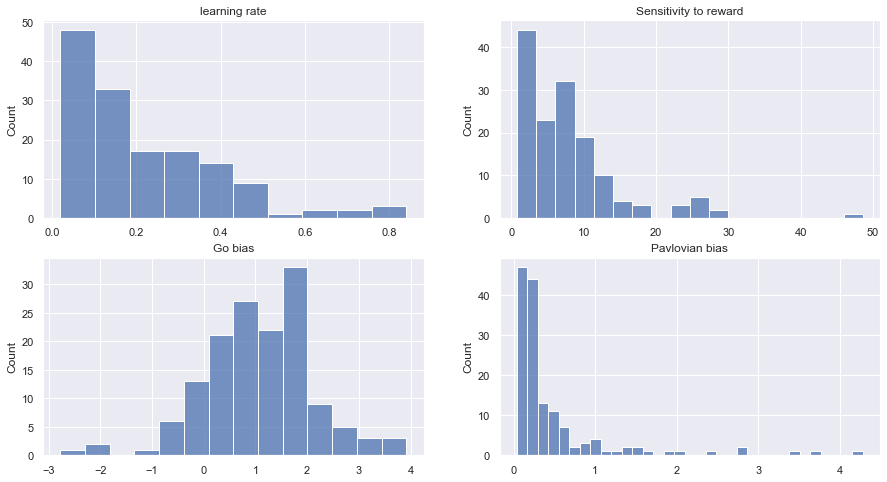

In [58]:
fig, axs = plt.subplots(2,2, figsize = (15,8))

ax1 = sns.histplot(first_model['alpha'], ax=axs[(0,0)])
ax1.set_title("learning rate")
ax1.set_xlabel("")
ax2 = sns.histplot(first_model['beta'], ax=axs[(0,1)])
ax2.set_title("Sensitivity to reward")
ax2.set_xlabel("")

ax3 = sns.histplot(first_model['bias'], ax=axs[(1,0)])
ax3.set_title("Go bias")
ax3.set_xlabel("")

ax4 = sns.histplot(first_model['pav'], ax=axs[(1,1)])
ax4.set_title("Pavlovian bias")
ax4.set_xlabel("");

# Second Session Model Statistics

In [63]:
second_model.describe()

,alpha,beta,noise,bias,pav
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.259273,9.191786,0.968319,0.767470,0.457341
std,0.168395,7.431000,0.027702,0.962902,0.583084
min,0.032786,0.750894,0.819275,-1.962736,0.046643
25%,0.149526,3.762400,0.968333,0.407551,0.139702
50%,0.210553,7.692565,0.976121,0.827825,0.247924
75%,0.339073,12.032628,0.981563,1.359116,0.532518
max,0.865346,35.859104,0.987472,2.827364,3.136981


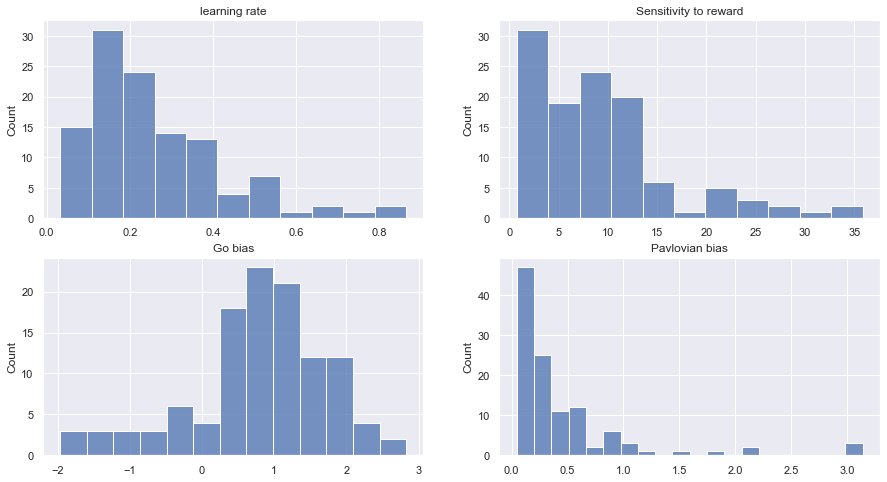

In [59]:
fig, axs = plt.subplots(2,2, figsize = (15,8))

ax1 = sns.histplot(second_model['alpha'], ax=axs[(0,0)])
ax1.set_title("learning rate")
ax1.set_xlabel("")
ax2 = sns.histplot(second_model['beta'], ax=axs[(0,1)])
ax2.set_title("Sensitivity to reward")
ax2.set_xlabel("")

ax3 = sns.histplot(second_model['bias'], ax=axs[(1,0)])
ax3.set_title("Go bias")
ax3.set_xlabel("")

ax4 = sns.histplot(second_model['pav'], ax=axs[(1,1)])
ax4.set_title("Pavlovian bias")
ax4.set_xlabel("");

In [104]:
first_second_model = pd.merge(second_model.rename(columns = { 'alpha':'alpha_second','beta':'beta_second','pav': 'pav_second', 'bias': 'bias_second'}),
                              first_model.rename(columns = {'alpha':'alpha_first', 'beta':'beta_first','pav': 'pav_first', 'bias': 'bias_first'}), 
                              on = 'mturkID', how = 'left')
first_round_perfornance = pd.read_csv('Data/first_round_final_performance.csv',index_col= 0)
second_round_perfornance = pd.read_csv('Data/second_round_final_performance.csv',index_col= 0)

all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')

model_perf = pd.merge(all_performance,first_second_model, on = 'mturkID')


# Sanity Check

# g2w + ng2ap - (ng2w + g2ap) vs. pavlovian 

<AxesSubplot:xlabel='second_pav_new_metric', ylabel='pav_second'>

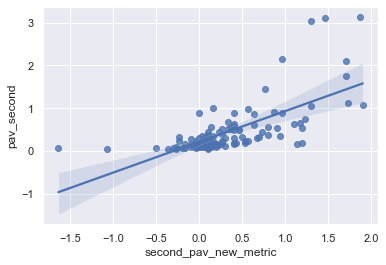

In [105]:
first_pav_new_metric = (model_perf['go2win_first_session'] + model_perf['nogo2avoidPun_first_session']) - (model_perf['nogo2win_first_session'] + model_perf['go2avoidPun_first_session'])
second_pav_new_metric = (model_perf['go2win_second_session'] + model_perf['nogo2avoidPun_second_session']) - (model_perf['nogo2win_second_session'] + model_perf['go2avoidPun_second_session'])

model_perf['first_pav_new_metric'] = first_pav_new_metric
model_perf['second_pav_new_metric'] = second_pav_new_metric
sns.regplot(x = 'second_pav_new_metric', y = 'pav_second', data = model_perf)


<AxesSubplot:xlabel='first_pav_new_metric', ylabel='pav_first'>

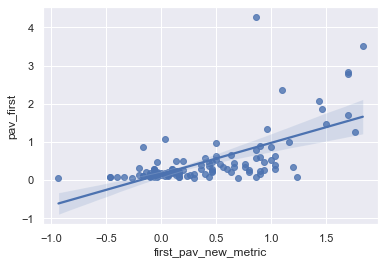

In [106]:
sns.regplot(x = 'first_pav_new_metric', y = 'pav_first', data = model_perf)


# g2w + g2ap - (ng2w + ng2ap) vs. bias 

<AxesSubplot:xlabel='second_bias_metric', ylabel='bias_second'>

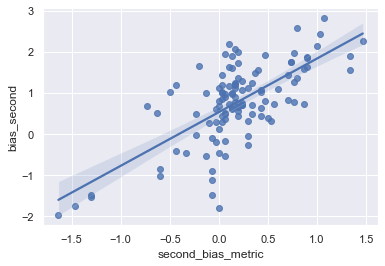

In [107]:
first_bias_metric = (model_perf['go2win_first_session'] + model_perf['go2avoidPun_first_session']) - (model_perf['nogo2win_first_session'] + model_perf['nogo2avoidPun_first_session'])
second_bias_metric = (model_perf['go2win_second_session'] + model_perf['go2avoidPun_second_session']) - (model_perf['nogo2win_second_session'] + model_perf['nogo2avoidPun_second_session'])

model_perf['first_bias_metric'] = first_bias_metric
model_perf['second_bias_metric'] = second_bias_metric
sns.regplot(x = 'second_bias_metric', y = 'bias_second', data = model_perf)


<AxesSubplot:xlabel='first_bias_metric', ylabel='bias_first'>

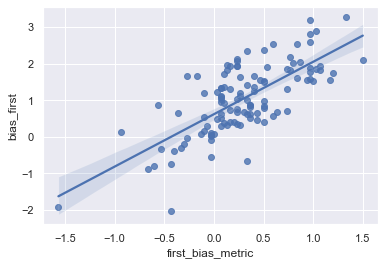

In [108]:
sns.regplot(x = 'first_bias_metric', y = 'bias_first', data = model_perf)


# Pavlovian first session vs. second session

## Pavlovian

<AxesSubplot:xlabel='pav_second', ylabel='pav_first'>

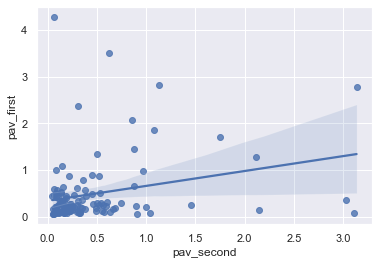

In [109]:
sns.regplot(x = 'pav_second', y = 'pav_first', 
            data = model_perf)

In [110]:

smf.ols(formula = 'pav_first ~ pav_second', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pav_first   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     8.525
Date:                Mon, 28 Feb 2022   Prob (F-statistic):            0.00424
Time:                        14:48:30   Log-Likelihood:                -116.23
No. Observations:                 114   AIC:                             236.5
Df Residuals:                     112   BIC:                             241.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3408      0.081      4.224      0.000       0.181       0.501
pav_second     0.3188      0.109      2.920      0.004       0.102       0.535
==============================================================================
Omnibus:                      102.812   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.664
Skew:                           3.125   Prob(JB):                    5.53e-210
Kurtosis:                      15.799   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
huber_t = sm.RLM(model_perf.pav_second, sm.add_constant(model_perf.pav_first), M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(
    hub_results.summary()
)


                    Robust linear Model Regression Results                    
Dep. Variable:             pav_second   No. Observations:                  114
Model:                            RLM   Df Residuals:                      112
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 28 Feb 2022                                         
Time:                        14:48:30                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2616      0.032      8.259      0.0

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## bias

<AxesSubplot:xlabel='bias_second', ylabel='bias_first'>

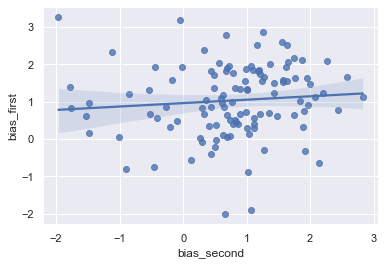

In [112]:
sns.regplot(x = 'bias_second', y = 'bias_first', 
            data = model_perf)

In [113]:

smf.ols(formula = 'pav_first ~ pav_second', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pav_first   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     8.525
Date:                Mon, 28 Feb 2022   Prob (F-statistic):            0.00424
Time:                        14:48:31   Log-Likelihood:                -116.23
No. Observations:                 114   AIC:                             236.5
Df Residuals:                     112   BIC:                             241.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3408      0.081      4.224      0.000       0.181       0.501
pav_second     0.3188      0.109      2.920      0.004       0.102       0.535
==============================================================================
Omnibus:                      102.812   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.664
Skew:                           3.125   Prob(JB):                    5.53e-210
Kurtosis:                      15.799   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Learning rate

<AxesSubplot:xlabel='alpha_second', ylabel='alpha_first'>

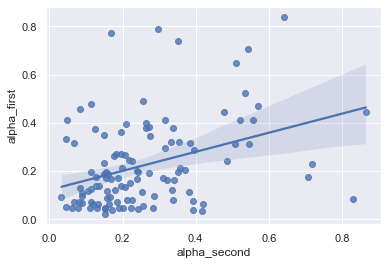

In [114]:
sns.regplot(x = 'alpha_second', y = 'alpha_first', 
            data = model_perf)

In [115]:

smf.ols(formula = 'alpha_first ~ alpha_second', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            alpha_first   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     17.64
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           5.38e-05
Time:                        14:48:33   Log-Likelihood:                 42.335
No. Observations:                 114   AIC:                            -80.67
Df Residuals:                     112   BIC:                            -75.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1218      0.029      4.194      0.000       0.064       0.179
alpha_second     0.3951      0.094      4.200      0.000       0.209       0.581
==============================================================================
Omnibus:                       28.012   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.593
Skew:                           1.187   Prob(JB):                     9.29e-10
Kurtosis:                       4.767   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Sesnsitivity to reward

<AxesSubplot:xlabel='beta_second', ylabel='beta_first'>

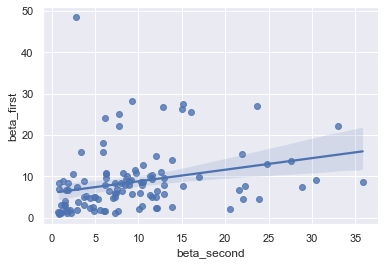

In [116]:
sns.regplot(x = 'beta_second', y = 'beta_first', 
            data = model_perf)

In [117]:

smf.ols(formula = 'beta_first ~ beta_second', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             beta_first   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     9.018
Date:                Mon, 28 Feb 2022   Prob (F-statistic):            0.00330
Time:                        14:48:56   Log-Likelihood:                -388.64
No. Observations:                 114   AIC:                             781.3
Df Residuals:                     112   BIC:                             786.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.9593      1.103      5.405      0.000       3.775       8.144
beta_second     0.2806      0.093      3.003      0.003       0.095       0.466
==============================================================================
Omnibus:                       80.923   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.228
Skew:                           2.442   Prob(JB):                    8.65e-105
Kurtosis:                      11.777   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (G2W - NG2W) vs. model paramters

In [119]:
model_perf['g2w_ng2w_first'] = model_perf['go2win_first_session'] - model_perf['nogo2win_first_session'] 



## pavlovian

<AxesSubplot:xlabel='pav_first', ylabel='g2w_ng2w_first'>

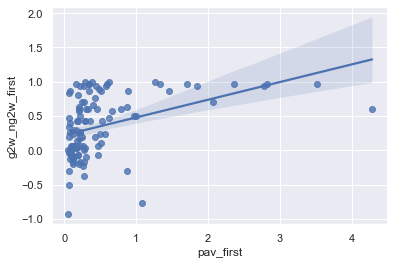

In [89]:
sns.regplot(y = "g2w_ng2w_first", x = 'pav_first', data=model_perf)

In [90]:

smf.ols(formula = 'pav_first ~ g2w_ng2w_first', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pav_first   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     22.91
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           5.23e-06
Time:                        14:42:01   Log-Likelihood:                -109.81
No. Observations:                 114   AIC:                             223.6
Df Residuals:                     112   BIC:                             229.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2578      0.077      3.363      0.001       0.106       0.410
g2w_ng2w_first     0.6582      0.138      4.786      0.000       0.386       0.931
==============================================================================
Omnibus:                       96.869   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.836
Skew:                           2.959   Prob(JB):                    3.05e-167
Kurtosis:                      14.243   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## bias

<AxesSubplot:xlabel='bias_first', ylabel='g2w_ng2w_first'>

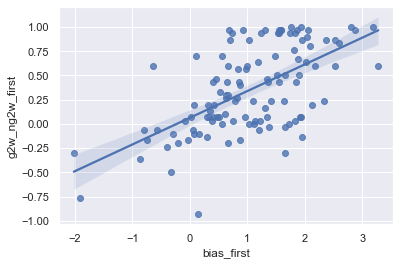

In [91]:
sns.regplot(y = "g2w_ng2w_first", x = 'bias_first', data=model_perf)

In [92]:

smf.ols(formula = 'bias_first ~ g2w_ng2w_first', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bias_first   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     64.98
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           9.14e-13
Time:                        14:43:15   Log-Likelihood:                -130.91
No. Observations:                 114   AIC:                             265.8
Df Residuals:                     112   BIC:                             271.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5691      0.092      6.170      0.000       0.386       0.752
g2w_ng2w_first     1.3339      0.165      8.061      0.000       1.006       1.662
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.008   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## learning rate

<AxesSubplot:xlabel='alpha_first', ylabel='g2w_ng2w_first'>

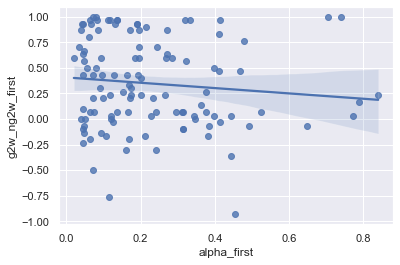

In [93]:
sns.regplot(y = "g2w_ng2w_first", x = 'alpha_first', data=model_perf)

In [94]:

smf.ols(formula = 'alpha_first ~ g2w_ng2w_first', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            alpha_first   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.310
Date:                Mon, 28 Feb 2022   Prob (F-statistic):              0.255
Time:                        14:43:48   Log-Likelihood:                 34.661
No. Observations:                 114   AIC:                            -65.32
Df Residuals:                     112   BIC:                            -59.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2397      0.022     11.104      0.000       0.197       0.282
g2w_ng2w_first    -0.0443      0.039     -1.145      0.255      -0.121       0.032
==============================================================================
Omnibus:                       33.364   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.782
Skew:                           1.380   Prob(JB):                     3.46e-12
Kurtosis:                       4.868   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## sensitivity to reward

<AxesSubplot:xlabel='beta_first', ylabel='g2w_ng2w_first'>

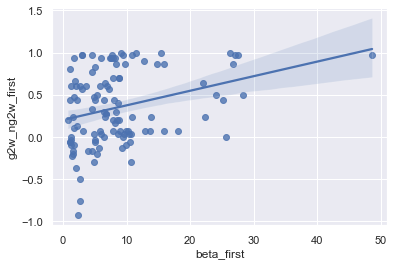

In [120]:
sns.regplot(y = "g2w_ng2w_first", x = 'beta_first', data=model_perf)